# Brain Tumor Segementation Using PyTorch

Dataset - https://www.kaggle.com/datasets/bilalakgz/brain-tumor-mri-dataset/data (Brain tumor MRI)


In [17]:
import os
from PIL import Image

# DIRECTORORIES
train_dir = '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/test'
val_dir = '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/valid'

In [18]:
val_imgs_files = os.listdir(val_dir+'/images')
val_labels_path = val_dir+'/labels/'

train_imgs_files = os.listdir(train_dir+'/images')


#### Sample image and its label

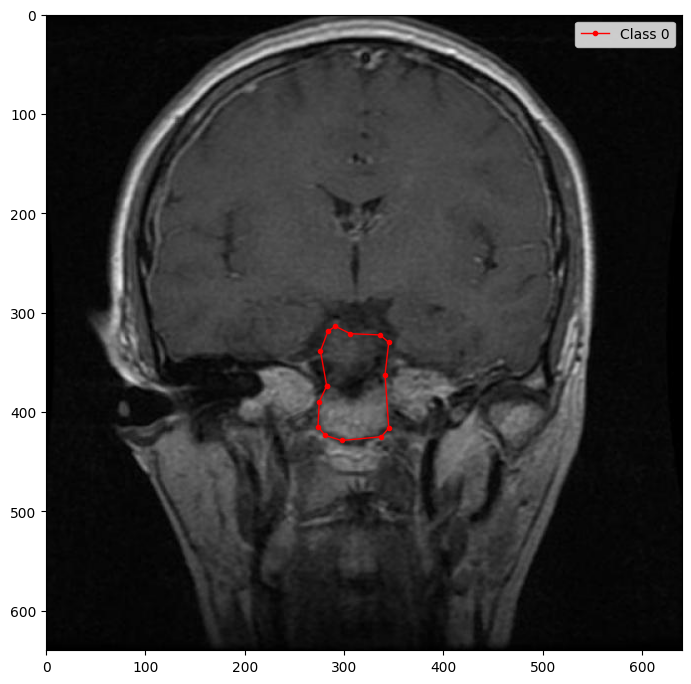

In [19]:
import matplotlib.pyplot as plt
import cv2
import random

random.seed(42)

def plot_images(num_images, val_dir, val_imgs_files):
    fig, axes = plt.subplots(1, num_images, figsize=(7 * num_images, 7))

    # If there's only one image, make `axes` a list to avoid indexing issues
    if num_images == 1:
        axes = [axes]
    
    for i in range(num_images):
        random_idx = random.randint(0, len(val_imgs_files) - 1)
        
        # Load the image
        image_path = '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images/Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.jpg'
        image = cv2.imread(image_path)
        img_height, img_width, _ = image.shape

        # Load the label file
        label_path = '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/labels/Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.txt'
        with open(label_path, 'r') as f:
            data = f.read().split()
        
        # Class label
        class_label = data[0]

        # Convert the image to RGB (OpenCV loads images in BGR by default)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Plot the image on the subplot
        ax = axes[i]
        ax.imshow(image_rgb)
        ax.set_xlim(0, img_width)
        ax.set_ylim(img_height, 0)

        # Process the label coordinates
        points = [(float(data[j]) * img_width, float(data[j+1]) * img_height) for j in range(1, len(data), 2)]

        # Plot the points on the image
        x_vals, y_vals = zip(*points)
        ax.plot(x_vals, y_vals, marker='o', color='red', markersize=3, linestyle='-', linewidth=1, label=f'Class {class_label}')

        # Set plot title and labels for each subplot
#         ax.set_title(f"Image: {val_imgs_files[random_idx]}")
        ax.legend()
    
    plt.tight_layout()
    plt.show()

plot_images(num_images=1, val_dir=train_dir, val_imgs_files=train_imgs_files)

## Applying K-Means

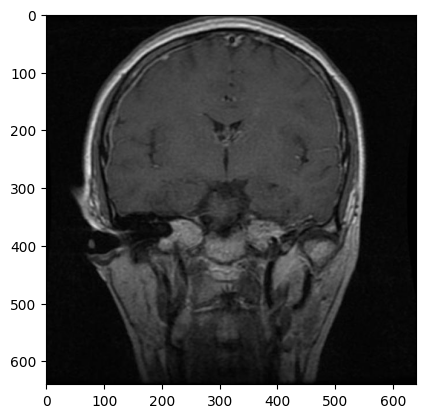

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

img = '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images/Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.jpg'

# read the img
image = cv2.imread(img)
# change the color
imgae = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [21]:
image.shape

(640, 640, 3)

In [22]:
# convert into 2D array
vals = image.reshape((-1, 3))
print(vals.shape)
vals = np.float32(vals)
print(vals)

(409600, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


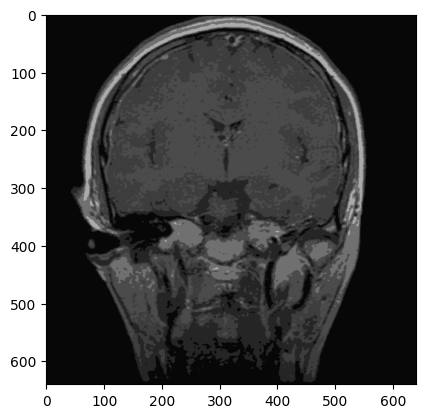

In [23]:
# criteria to stop the code
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# perform K-Means
k = 6
retval, labels, centers = cv2.kmeans(vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

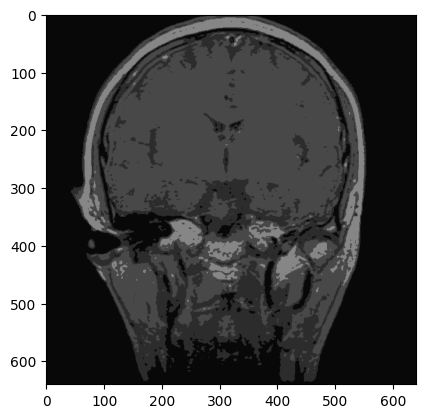

In [24]:
# criteria to stop the code
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# perform K-Means
k = 4
retval, labels, centers = cv2.kmeans(vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

In [25]:
segmented_data

array([[8, 8, 8],
       [8, 8, 8],
       [8, 8, 8],
       ...,
       [8, 8, 8],
       [8, 8, 8],
       [8, 8, 8]], dtype=uint8)

In [26]:
centers

array([[ 44,  44,  44],
       [ 72,  72,  72],
       [  8,   8,   8],
       [134, 134, 134]], dtype=uint8)

(-0.5, 639.5, 639.5, -0.5)

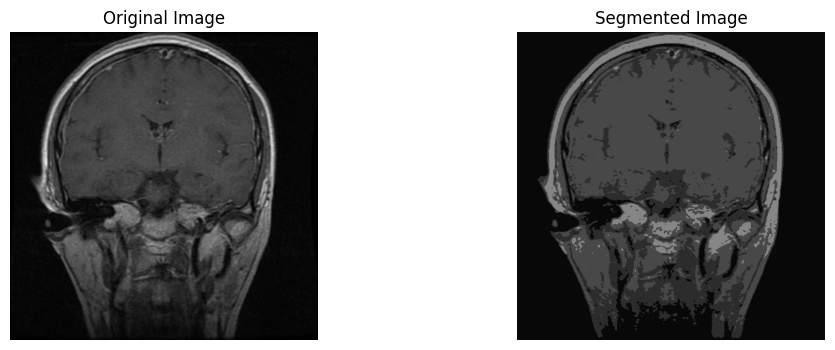

In [27]:
plt.figure(figsize=(12, 4))
    
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
    
plt.subplot(122)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

## Mean shift clustering

In [28]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [29]:
# Load the image
image_path = '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images/Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [30]:
# Convert image to L*a*b* color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

In [31]:
# Flatten the image
flat_image = lab_image.reshape((-1, 3))

In [32]:
# Create the feature space [L, a, b, x, y]
height, width, _ = image.shape
x, y = np.meshgrid(np.arange(width), np.arange(height))
flat_image_with_coordinates = np.column_stack([flat_image, x.flatten(), y.flatten()])


In [33]:
# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(flat_image_with_coordinates, quantile=0.2, n_samples=50)
bandwidth

184.96660965696185

In [34]:
# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(flat_image_with_coordinates)
labels = mean_shift.labels_

In [35]:
# Reshape the labels to the original image shape
segmented_image = labels.reshape((height, width))

In [36]:
# Generate a colored segmented image
unique_labels = np.unique(labels)
segmented_colors = np.random.randint(0, 255, size=(len(unique_labels), 3))
colored_segmented_image = segmented_colors[segmented_image]

(-0.5, 639.5, 639.5, -0.5)

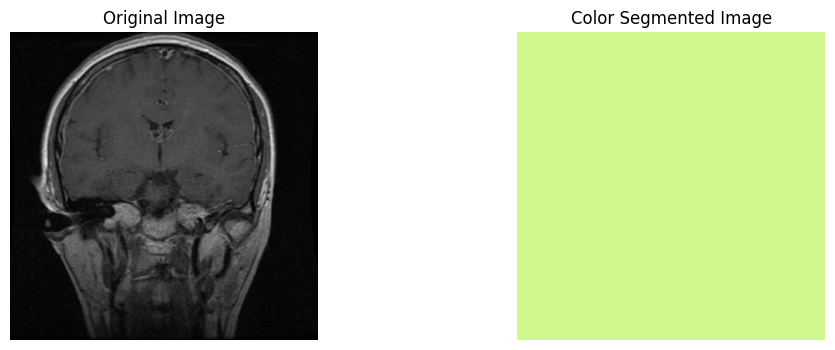

In [37]:
plt.figure(figsize=(12, 4))
    
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
    
plt.subplot(122)
plt.imshow(colored_segmented_image)
plt.title('Color Segmented Image')
plt.axis('off')

## Normalized Cuts (NCut)

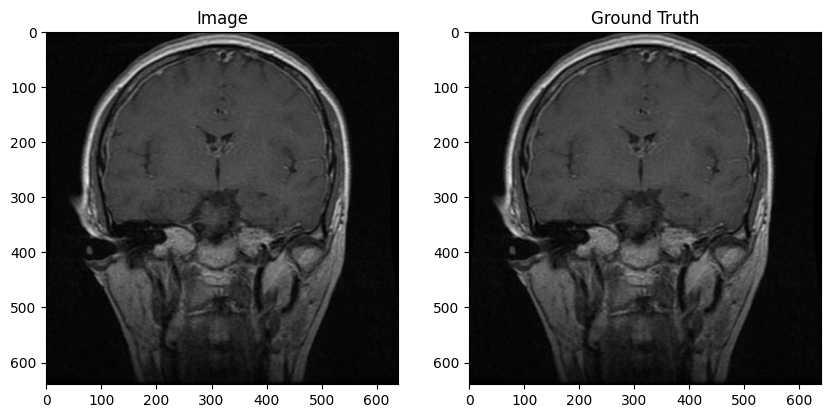

In [38]:
from skimage import io, segmentation, color, measure
from skimage import graph
import numpy as np
import matplotlib.pyplot as plt

# Load the image and its ground truth
image = io.imread('/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images/Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.jpg')
ground_truth = io.imread('/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images/Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.jpg')

# show images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(ground_truth)
ax[1].set_title('Ground Truth')
plt.show()

In [39]:
from skimage.util import img_as_ubyte, img_as_float, img_as_uint, img_as_float64

# compactness controls the balance between the color similarity and spatial proximity of pixels
# allows the superpixels to vary more in spatial size in order to respect the color differences more accurately.  
compactness=10

# n_segments controls the number of superpixels (or segments) that the SLIC algorithm attempts to generate in the image
n_segments=50
labels = segmentation.slic(image, compactness=compactness, n_segments=n_segments, enforce_connectivity=True)
image_with_boundaries = segmentation.mark_boundaries(image, labels, color=(0, 0, 0))
image_with_boundaries = img_as_ubyte(image_with_boundaries)
pixel_labels = color.label2rgb(labels, image_with_boundaries, kind='avg', bg_label=0)

Text(0.5, 1.0, 'Segmented image (normalized cut)')

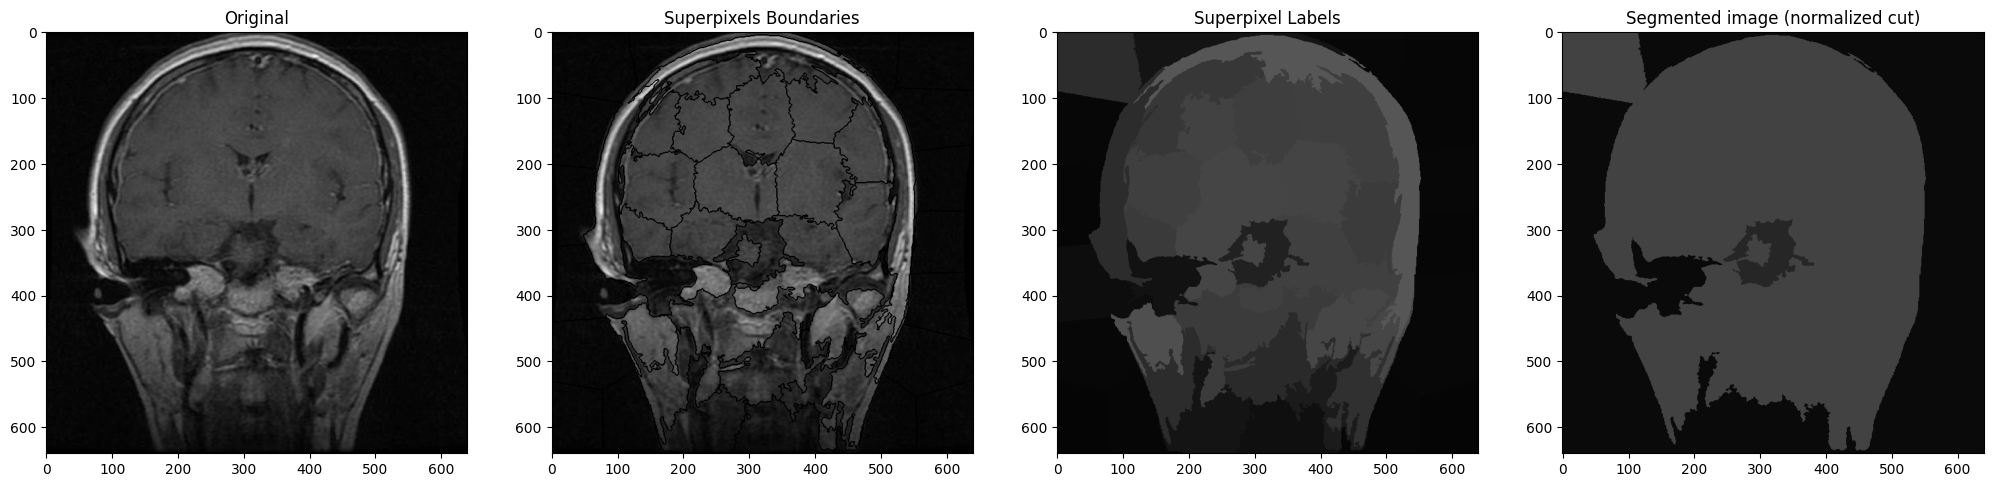

In [40]:
# using the labels found with the superpixeled image
# compute the Region Adjacency Graph using mean colors
g = graph.rag_mean_color(image, labels, mode='similarity')

# perform Normalized Graph cut on the Region Adjacency Graph
labels2 = graph.cut_normalized(labels, g)
segmented_image = color.label2rgb(labels2, image, kind='avg')
f, axarr = plt.subplots(nrows=1, ncols=4, figsize=(25, 20))

axarr[0].imshow(image)
axarr[0].set_title("Original")

#plot boundaries
axarr[1].imshow(image_with_boundaries)
axarr[1].set_title("Superpixels Boundaries")

#plot labels
axarr[2].imshow(pixel_labels)
axarr[2].set_title('Superpixel Labels')

#compute segmentation
axarr[3].imshow(segmented_image)
axarr[3].set_title('Segmented image (normalized cut)')

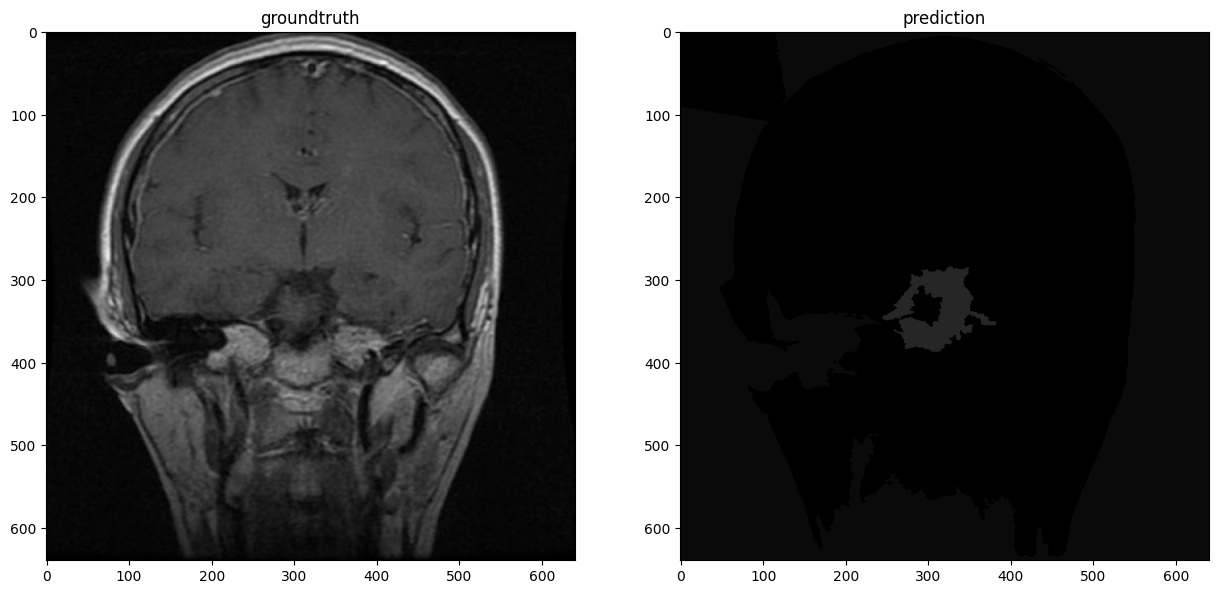

In [41]:
def compute_mask(image):
  color_dict = {}

  # Get the shape of the image
  height,width,_ = image.shape

  # Create an empty array for labels
  labels = np.zeros((height,width),dtype=int)
  id=0
  # Loop over each pixel
  for i in range(height):
      for j in range(width):
          # Get the color of the pixel
          color = tuple(image[i,j])
          # Check if it is in the dictionary
          if color in color_dict:
              # Assign the label from the dictionary
              labels[i,j] = color_dict[color]
          else:
              color_dict[color]=id
              labels[i,j] = id
              id+=1

  return(labels)
def show_img(prediction, groundtruth):
    f, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

    axarr[0].imshow(groundtruth)
    axarr[0].set_title("groundtruth")
    axarr[1].imshow(prediction)
    axarr[1].set_title(f"prediction")
prediction_mask = compute_mask(segmented_image)
groundtruth_mask = compute_mask(ground_truth)

#usign the original image as baseline to convert from labels to color
prediction_img = color.label2rgb(prediction_mask, image, kind='avg', bg_label=0)
groundtruth_img = color.label2rgb(groundtruth_mask, image, kind='avg', bg_label=0)

show_img(prediction_img, groundtruth_img)

In [42]:
from sklearn.metrics import jaccard_score
from skimage.metrics import structural_similarity as ssim

ssim_score = ssim(prediction_img, groundtruth_img, channel_axis=2)
print(f"SSIM SCORE: {ssim_score}")

jac = jaccard_score(y_true=np.asarray(groundtruth_mask).flatten(),
                        y_pred=np.asarray(prediction_mask).flatten(),
                        average = None)

# compute mean IoU score across all classes
mean_iou = np.mean(jac)
print(f"Mean IoU: {mean_iou}")

SSIM SCORE: 0.31932275307273844
Mean IoU: 5.5021582556802094e-05


## PyTorch - SegNet

In [1]:
import torch.nn as nn


class ConvReLU(nn.Module):
    def __init__(self, in_c, out_c, kernel_size=3, padding=1) -> None:
        super(ConvReLU, self).__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel_size=kernel_size, padding=padding)
        self.bn = nn.BatchNorm2d(out_c)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x
    

class EncoderBlock(nn.Module):
    def __init__(self, in_c, out_c, depth=2, kernel_size=3, padding=1) -> None:
        super(EncoderBlock, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(depth):
            self.layers.append(ConvReLU(in_c if i == 0 else out_c, out_c, kernel_size, padding))
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x, ind = self.pool(x)
        return x, ind

class DecoderBlock(nn.Module):
    def __init__(self, in_c, out_c, depth=2, kernel_size=3, padding=1, classification=False) -> None:
        super(DecoderBlock, self).__init__()
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.layers = nn.ModuleList()
        for i in range(depth):
            if i == depth - 1 and classification:
                self.layers.append(nn.Conv2d(in_c, out_c, kernel_size=kernel_size, padding=padding))
            elif i == depth - 1:
                self.layers.append(ConvReLU(in_c, out_c, kernel_size=kernel_size, padding=padding))
            else:
                self.layers.append(ConvReLU(in_c, in_c, kernel_size=kernel_size, padding=padding))

    def forward(self, x, ind):
        x = self.unpool(x, ind)
        for layer in self.layers:
            x = layer(x)
        return x


In [2]:
class SegNet(nn.Module): 
    def __init__(self, in_channels=3, out_channels=1, features=64) -> None:
        super(SegNet, self).__init__()

        # Encoder
        self.enc0 = EncoderBlock(in_channels, features)
        self.enc1 = EncoderBlock(features, features * 2)
        self.enc2 = EncoderBlock(features * 2, features * 4, depth=3)
        self.enc3 = EncoderBlock(features * 4, features * 8, depth=3)

        # Bottleneck
        self.bottleneck_enc = EncoderBlock(features * 8, features * 8, depth=3) 
        self.bottleneck_dec = DecoderBlock(features * 8, features * 8, depth=3) 

        # Decoder
        self.dec0 = DecoderBlock(features * 8, features * 4, depth=3)
        self.dec1 = DecoderBlock(features * 4, features * 2, depth=3)
        self.dec2 = DecoderBlock(features * 2, features)
        self.dec3 = DecoderBlock(features, out_channels, classification=True) # No activation

    def forward(self, x):
        # encoder
        e0, ind0 = self.enc0(x) 
        e1, ind1 = self.enc1(e0) 
        e2, ind2 = self.enc2(e1) 
        e3, ind3 = self.enc3(e2)

        # bottleneck
        b0, indb = self.bottleneck_enc(e3)
        b1 = self.bottleneck_dec(b0, indb)

        # decoder
        d0 = self.dec0(b1, ind3)
        d1 = self.dec1(d0, ind2)
        d2 = self.dec2(d1, ind1)

        # classification layer
        output = self.dec3(d2, ind0)  
        return output

In [9]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained SegNet model
model = SegNet()
model.eval()  # Set the model to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 1: Load the image
  # Replace with your image path
image_path='/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images/Tr-piTr_0006_jpg.rf.0a165c638bbec1b0d959229db9fba43d.jpg'
image = Image.open(image_path).convert('RGB')

# Step 2: Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match model input size, modify as necessary
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet stats
])

input_tensor = preprocess(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Step 3: Pass the image through the model
with torch.no_grad():  # No gradient calculation for inference
    output = model(input_tensor)

# Step 4: Postprocess the output
output = torch.sigmoid(output).squeeze().cpu().numpy()  # Apply sigmoid and move to CPU
output_image = (output > 0.5).astype('uint8')  # Thresholding to create a binary mask (modify as needed)

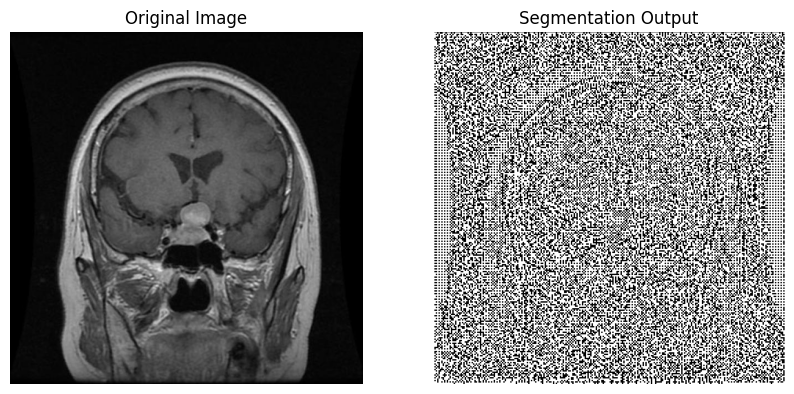